In [1]:
import pandas as pd

df = pd.read_csv("/content/big_startup_secsees_dataset.csv")
print(df.head())


                             permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           200

In [2]:
import pandas as pd
import numpy as np # Import numpy library and assign it to the alias np

df["funding_total_usd"] = df["funding_total_usd"].replace("–", np.nan)
df["funding_total_usd"] = pd.to_numeric(df["funding_total_usd"], errors="coerce")

In [3]:
# Calculate the percentage of null values for each column
null_percentages = df.isnull().sum() / len(df) * 100

# Display the results
print(null_percentages)


permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd    19.263802
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64


In [4]:
df["category_list"].fillna("Unknown", inplace=True)
df["country_code"].fillna("Unknown", inplace=True)
df["region"].fillna("Unknown", inplace=True)
df["first_funding_at"].fillna(df["first_funding_at"].mode()[0], inplace=True)

<ipython-input-4-d331b93ded6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["category_list"].fillna("Unknown", inplace=True)
<ipython-input-4-d331b93ded6b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [5]:
# Create a missing value indicator column
df["founded_at_missing"] = df["founded_at"].isnull().astype(int)

# Fill missing values (using an unlikely date, such as January 1, 1900)
df["founded_at"].fillna("1900-01-01", inplace=True)

# Convert to datetime, using errors='coerce' to handle out-of-range dates by converting them to NaT
df["founded_at"] = pd.to_datetime(df["founded_at"], errors='coerce')

# Create a derived column: company age
# Use fillna(0) to handle NaT values by setting the company age to 0
df["company_age"] = (pd.to_datetime("today") - df["founded_at"]).dt.days.fillna(0) / 365


<ipython-input-5-ba0b88bd77e8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["founded_at"].fillna("1900-01-01", inplace=True)


In [6]:
df.head(20)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_missing,company_age
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,1900-01-01,2015-01-05,2015-01-05,1,125.432877
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0,10.682192
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown,NaN,Unknown,NaN,1,1900-01-01,2014-01-30,2014-01-30,1,125.432877
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,18.361644
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,15.358904
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,1900-01-01,2014-07-01,2014-07-01,1,125.432877
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,0,28.367123
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0,14.358904
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0,13.778082
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.0,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,0,13.358904


In [7]:
# To avoid division by zero, add 1 to funding_rounds when it's 0
df["funding_density"] = df["funding_total_usd"] / (df["funding_rounds"] + 1)

In [8]:
df["has_website"] = df["homepage_url"].apply(lambda x: 0 if x in ["N/A", np.nan] else 1)


In [9]:
df.drop(columns=["name", "state_code", "city", "region"], inplace=True)

In [10]:
# Calculate the funding gap (in days)
df["funding_gap_days"] = (
    pd.to_datetime(df["last_funding_at"], errors="coerce") -
    pd.to_datetime(df["first_funding_at"], errors="coerce")
).dt.days

# Optional: if there is only one round of funding or the gap is negative, fill with 0 to indicate no interval
df.loc[df["funding_rounds"] <= 1, "funding_gap_days"] = 0
df.loc[df["funding_gap_days"] <= 0, "funding_gap_days"] = 0

In [11]:
df["funding_gap_days"].describe()
df['funding_gap_days'].value_counts()

,count
funding_gap_days,
0.0,42750
365.0,143
396.0,64
273.0,64
304.0,62
...,...
3826.0,1
2499.0,1
2494.0,1


In [12]:
df.head()

,permalink,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_missing,company_age,funding_density,has_website,funding_gap_days
0,/organization/-fame,http://livfame.com,Media,10000000.0,operating,IND,1,1900-01-01,2015-01-05,2015-01-05,1,125.432877,5.000000e+06,1,0.0
1,/organization/-qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014-09-04,2014-03-01,2014-10-14,0,10.682192,2.333333e+05,1,227.0
2,/organization/-the-one-of-them-inc-,http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown,1,1900-01-01,2014-01-30,2014-01-30,1,125.432877,1.703439e+06,1,0.0
3,/organization/0-6-com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19,0,18.361644,1.000000e+06,1,0.0
4,/organization/004-technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,1,2010-01-01,2014-07-24,2014-07-24,0,15.358904,NaN,1,0.0


In [13]:
df.status.value_counts()

,count
status,
operating,53034
closed,6238
acquired,5549
ipo,1547


EDA

In [14]:
# Download the map file (if not already downloaded)
!wget -nc https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip -P /tmp/
!unzip -n /tmp/ne_110m_admin_0_countries.zip -d /tmp/

# Load the map data
import geopandas as gpd
world = gpd.read_file("/tmp/ne_110m_admin_0_countries.shp")

--2025-05-08 21:56:51--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.189.1, 52.92.146.169, 3.5.82.233, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.189.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘/tmp/ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   547KB/s    in 0.4s    

2025-05-08 21:56:52 (547 KB/s) - ‘/tmp/ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  /tmp/ne_110m_admin_0_countries.zip
  inflating: /tmp/ne_110m_admin_0_countries.README.html  
 extracting: /tmp/ne_110m_admin_0_countries.VERSION.txt  
 extracting: /tmp/ne_110m_admin_0_countries.cpg  
  inflating: /tmp/ne_110m_admin_0_countries.dbf  
  inflating: /tmp/ne_110m_admin_0_countries.prj  
  inflating: /tmp/ne_110m_admin_0_countries.sh

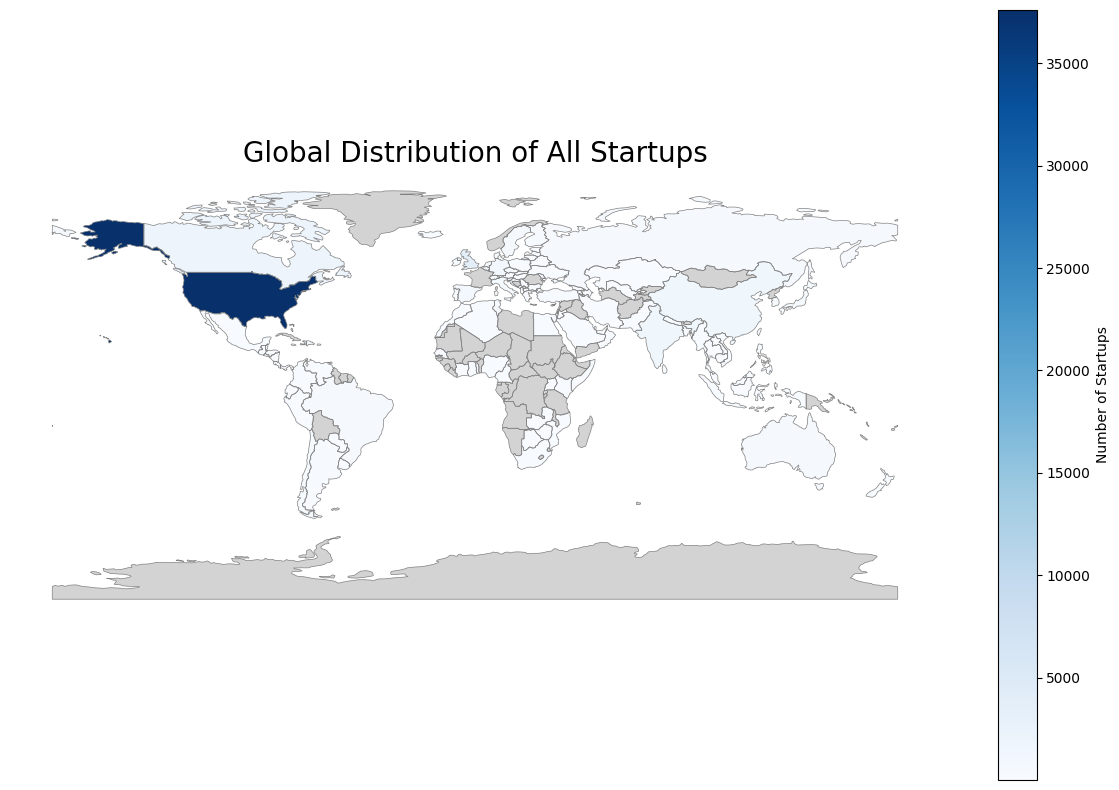

In [15]:
# Ensure previous steps still work, including installation and map loading
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of startups in each country (regardless of success)
startup_count = df.groupby("country_code").size().reset_index(name="startup_count")

# Prepare map data (as before)
# Load world map shapefile
world = world.rename(columns={"ISO_A3": "country_code"})
merged_all = world.merge(startup_count, on="country_code", how="left")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot borders and main map layer
merged_all.boundary.plot(ax=ax, linewidth=0.5, color='gray')
merged_all.plot(
    column="startup_count",
    cmap="Blues",
    legend=True,
    legend_kwds={"label": "Number of Startups"},
    ax=ax,
    missing_kwds={"color": "lightgray", "label": "No data"}
)

plt.title("Global Distribution of All Startups", fontsize=20)
plt.axis("off")
plt.show()


In [16]:
def label_status(x):
    if x in ["ipo", "acquired"]:
        return "success"
    elif x == "closed":
        return "fail"
    else:
        return "operating"

df["status_grouped"] = df["status"].apply(label_status)

In [17]:
usacount = df[df['country_code'] == 'USA']
usacount

,permalink,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_missing,company_age,funding_density,has_website,funding_gap_days,status_grouped
1,/organization/-qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014-09-04,2014-03-01,2014-10-14,0,10.682192,2.333333e+05,1,227.0,operating
4,/organization/004-technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,1,2010-01-01,2014-07-24,2014-07-24,0,15.358904,NaN,1,0.0,operating
7,/organization/0xdata,http://h2o.ai/,Analytics,33600000.0,operating,USA,4,2011-01-01,2013-01-03,2015-11-09,0,14.358904,6.720000e+06,1,1040.0,operating
8,/organization/1,http://whatis1.com,Mobile,1150050.0,operating,USA,3,2011-08-01,2011-07-20,2014-02-05,0,13.778082,2.875125e+05,1,931.0,operating
10,/organization/1-4-all,NaN,Entertainment|Games|Software,NaN,operating,USA,1,1900-01-01,2013-04-21,2013-04-21,1,125.432877,NaN,0,0.0,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,3300000.0,operating,USA,2,2013-01-01,2015-04-01,2015-10-27,0,12.356164,1.100000e+06,1,209.0,operating
66357,/organization/zypsee,http://whisk.me,Public Transportation,2150000.0,operating,USA,2,2011-01-01,2013-07-26,2013-09-25,0,14.358904,7.166667e+05,1,61.0,operating
66359,/organization/zyrra,http://www.zyrra.com,E-Commerce,1510500.0,operating,USA,4,1900-01-01,2010-10-21,2012-10-18,1,125.432877,3.021000e+05,1,728.0,operating
66360,/organization/zystor,http://www.zystor.com,Biotechnology,8500000.0,acquired,USA,1,1900-01-01,2004-12-16,2004-12-16,1,125.432877,4.250000e+06,1,0.0,success


In [18]:
usacount["status_grouped"].value_counts() # status_grouped should be accessed as a column of usacount
usacount["status_grouped"].value_counts()/len(usacount)

,count
status_grouped,
operating,0.782665
success,0.140023
fail,0.077312


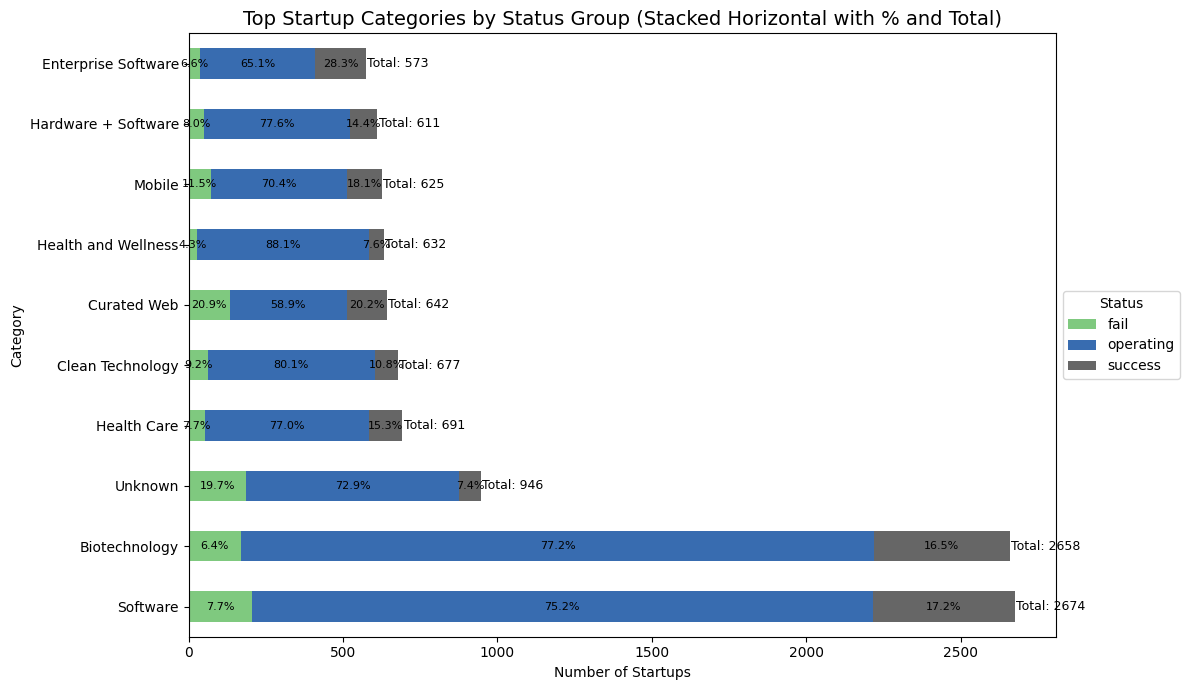

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of startups in each category by status
category_counts = usacount.groupby(["category_list", "status_grouped"]).size().unstack(fill_value=0)

# Select the top N categories by total count
top_n = 10
top_categories = category_counts.sum(axis=1).nlargest(top_n).index
category_counts_top = category_counts.loc[top_categories]

# Plot a horizontal stacked bar chart
ax = category_counts_top.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 7),
    colormap="Accent"
)

plt.title("Top Startup Categories by Status Group (Stacked Horizontal with % and Total)", fontsize=14)
plt.xlabel("Number of Startups")
plt.ylabel("Category")
plt.legend(title="Status", loc='center left', bbox_to_anchor=(1.0, 0.5))

# Add percentage labels + total counts
for i, (idx, row) in enumerate(category_counts_top.iterrows()):
    total = row.sum()
    x_offset = 0
    for status in category_counts_top.columns:
        count = row[status]
        if count > 0:
            percent = count / total * 100
            ax.text(
                x_offset + count / 2, i,
                f"{percent:.1f}%",
                va='center', ha='center', fontsize=8, color='black'
            )
            x_offset += count
    # Show total count label at the far right
    ax.text(x_offset + 5, i, f"Total: {total}", va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()



In [20]:
usacount['funding_density'].describe()

,funding_density
count,3.142900e+04
mean,5.935254e+06
std,6.360672e+07
min,5.000000e-01
25%,2.316667e+05
50%,1.046088e+06
75%,4.400000e+06
max,8.800000e+09


<ipython-input-21-1c382fac91bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


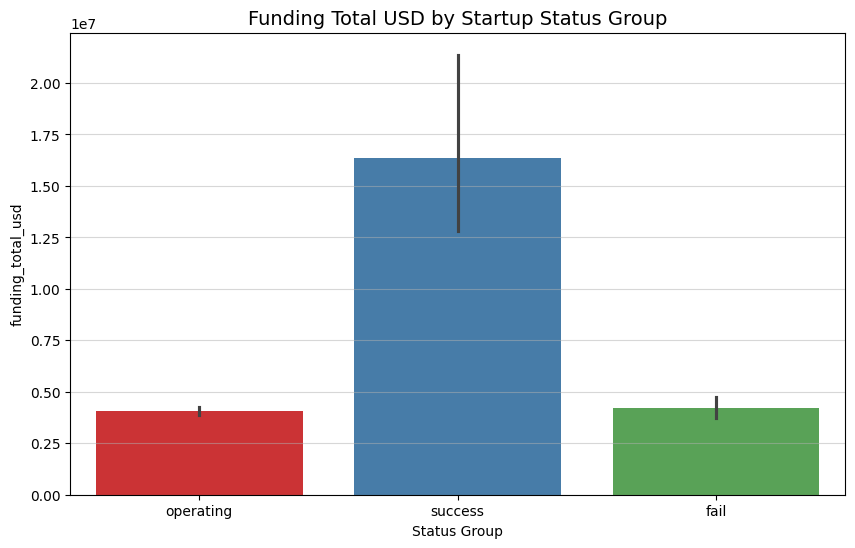

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Plot the distribution of funding rounds under different statuses
sns.barplot(
    data=usacount,
    x="status_grouped",
    y="funding_density",
    palette="Set1"
)

plt.title("Funding Total USD by Startup Status Group", fontsize=14)
plt.xlabel("Status Group")
plt.ylabel("funding_total_usd")
plt.grid(axis="y", alpha=0.5)

plt.show()


ML

In [22]:
usacount

,permalink,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_missing,company_age,funding_density,has_website,funding_gap_days,status_grouped
1,/organization/-qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014-09-04,2014-03-01,2014-10-14,0,10.682192,2.333333e+05,1,227.0,operating
4,/organization/004-technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,1,2010-01-01,2014-07-24,2014-07-24,0,15.358904,NaN,1,0.0,operating
7,/organization/0xdata,http://h2o.ai/,Analytics,33600000.0,operating,USA,4,2011-01-01,2013-01-03,2015-11-09,0,14.358904,6.720000e+06,1,1040.0,operating
8,/organization/1,http://whatis1.com,Mobile,1150050.0,operating,USA,3,2011-08-01,2011-07-20,2014-02-05,0,13.778082,2.875125e+05,1,931.0,operating
10,/organization/1-4-all,NaN,Entertainment|Games|Software,NaN,operating,USA,1,1900-01-01,2013-04-21,2013-04-21,1,125.432877,NaN,0,0.0,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,3300000.0,operating,USA,2,2013-01-01,2015-04-01,2015-10-27,0,12.356164,1.100000e+06,1,209.0,operating
66357,/organization/zypsee,http://whisk.me,Public Transportation,2150000.0,operating,USA,2,2011-01-01,2013-07-26,2013-09-25,0,14.358904,7.166667e+05,1,61.0,operating
66359,/organization/zyrra,http://www.zyrra.com,E-Commerce,1510500.0,operating,USA,4,1900-01-01,2010-10-21,2012-10-18,1,125.432877,3.021000e+05,1,728.0,operating
66360,/organization/zystor,http://www.zystor.com,Biotechnology,8500000.0,acquired,USA,1,1900-01-01,2004-12-16,2004-12-16,1,125.432877,4.250000e+06,1,0.0,success


In [23]:
usacount["status_grouped"].value_counts()/len(usacount)


,count
status_grouped,
operating,0.782665
success,0.140023
fail,0.077312


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
usacount["status_grouped_label"] = le.fit_transform(usacount["status_grouped"])


<ipython-input-24-5a82b90c94ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usacount["status_grouped_label"] = le.fit_transform(usacount["status_grouped"])


Feature Importance for Predicting Multiclass classification

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Feature columns
features = ["funding_total_usd", "funding_rounds", "founded_at_missing", "funding_density", "company_age", "has_website", "funding_gap_days"]
X = usacount[features]
y = usacount["status_grouped_label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model training
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))



              precision    recall  f1-score   support

        fail       0.14      0.26      0.18       582
   operating       0.82      0.80      0.81      5886
     success       0.33      0.22      0.27      1053

    accuracy                           0.68      7521
   macro avg       0.43      0.43      0.42      7521
weighted avg       0.70      0.68      0.69      7521



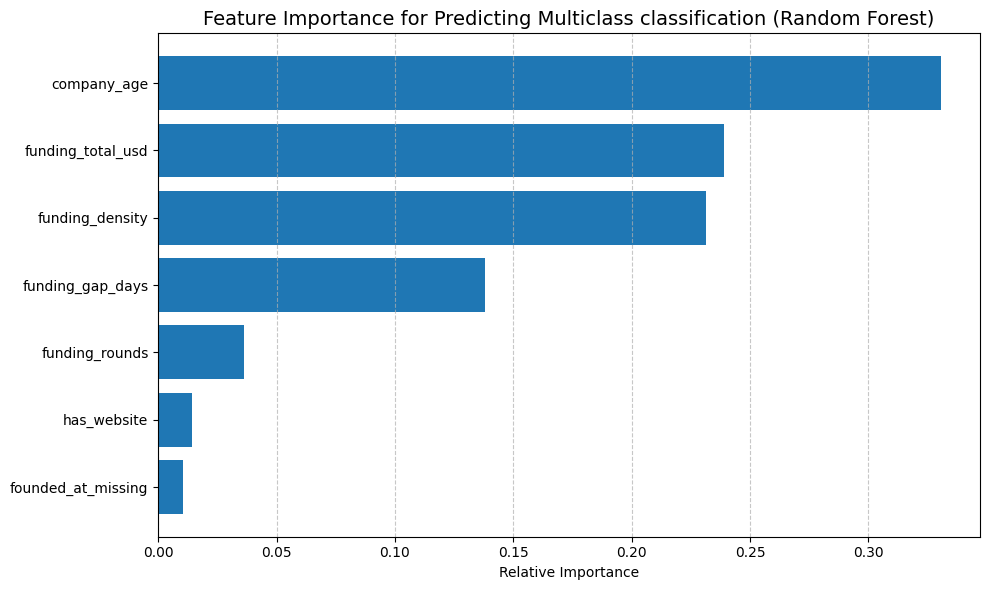

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Put into DataFrame for easier handling
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="#1f77b4")
plt.title("Feature Importance for Predicting Multiclass classification (Random Forest)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
!pip install xgboost
import xgboost as xgb

# Encode the target variable
le = LabelEncoder()
usacount["status_grouped_label"] = le.fit_transform(usacount["status_grouped"])

# Feature columns (can be expanded)
features = [
    "funding_total_usd",
    "funding_rounds",
    "funding_density",
    "company_age",
    "has_website",
    "funding_gap_days"
]
X = usacount[features]
y = usacount["status_grouped_label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Model training
model = XGBClassifier(
    objective="multi:softprob",  # Multiclass classification
    num_class=3,                 # Number of classes (e.g., success / fail / operating)
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


<ipython-input-27-6bb8efc7bf11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usacount["status_grouped_label"] = le.fit_transform(usacount["status_grouped"])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

        fail       0.15      0.00      0.01       582
   operating       0.80      0.97      0.88      5886
     success       0.48      0.16      0.24      1053

    accuracy                           0.78      7521
   macro avg       0.48      0.38      0.38      7521
weighted avg       0.71      0.78      0.72      7521



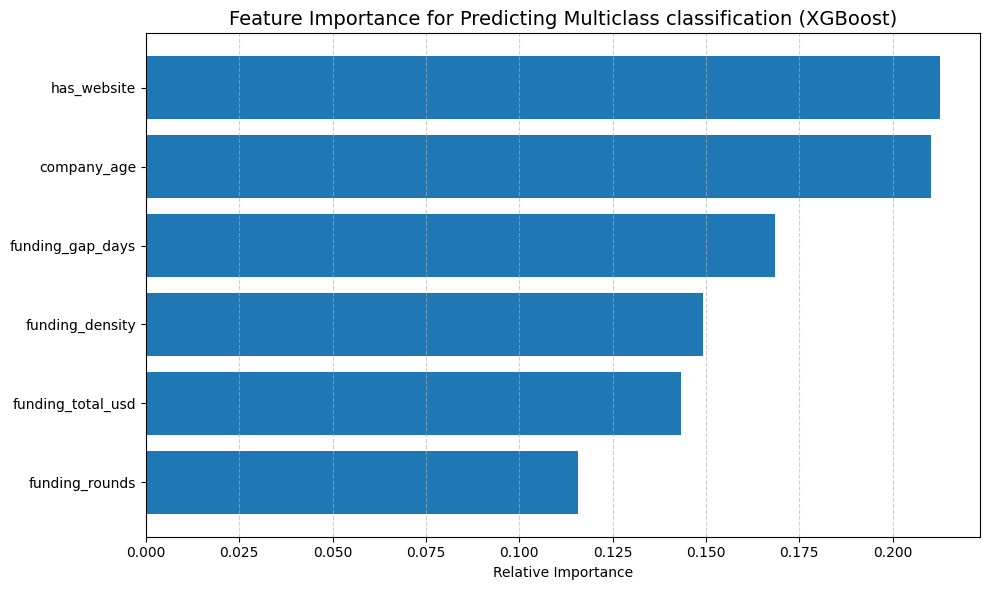

In [41]:
# Extract feature importances and convert to a DataFrame
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="#1f77b4")
plt.title("Feature Importance for Predicting Multiclass classification (XGBoost)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Feature Importance for Predicting Success

In [42]:
usacount["is_success"] = usacount["status_grouped"].apply(lambda x: 1 if x == "success" else 0)


<ipython-input-42-24bf0e8172f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usacount["is_success"] = usacount["status_grouped"].apply(lambda x: 1 if x == "success" else 0)


Predicting Success(Random Forest)

In [45]:
# Handle class imbalance: automatically balance each class
model_rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",  # Automatically balance the number of fail / not-fail samples
    n_estimators=100
)

model_rf.fit(X_train, y_train)

# Prediction and evaluation
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=["Not Success", "Success"]))


              precision    recall  f1-score   support

 Not Success       0.88      0.91      0.90      6468
     Success       0.29      0.21      0.25      1053

    accuracy                           0.82      7521
   macro avg       0.58      0.56      0.57      7521
weighted avg       0.79      0.82      0.80      7521



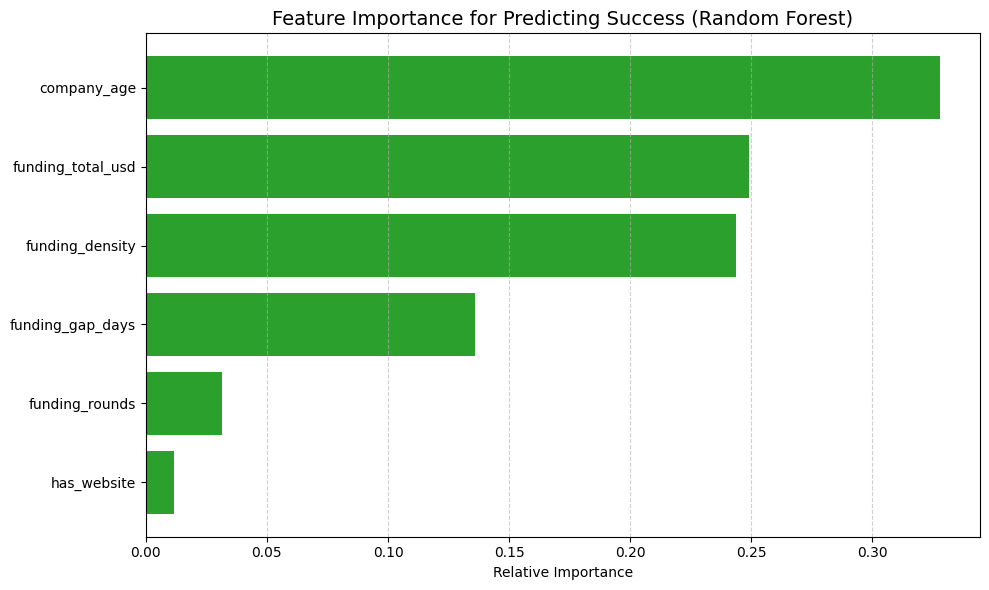

In [46]:
importances_rf = model_rf.feature_importances_
feat_usacount_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_usacount_rf["Feature"], feat_usacount_rf["Importance"], color="#2ca02c")
plt.title("Feature Importance for Predicting Success (Random Forest)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [43]:
from xgboost import XGBClassifier

features = [
    "funding_total_usd",
    "funding_rounds",
    "funding_density",
    "company_age",
    "has_website",
    "funding_gap_days"
]

X = usacount[features]
y = usacount["is_success"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))  # To handle class imbalance
)

model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_prob > 0.8).astype(int)
#y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred_threshold, target_names=["Not Success", "Success"]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

 Not Success       0.88      0.96      0.92      6468
     Success       0.44      0.21      0.28      1053

    accuracy                           0.85      7521
   macro avg       0.66      0.58      0.60      7521
weighted avg       0.82      0.85      0.83      7521



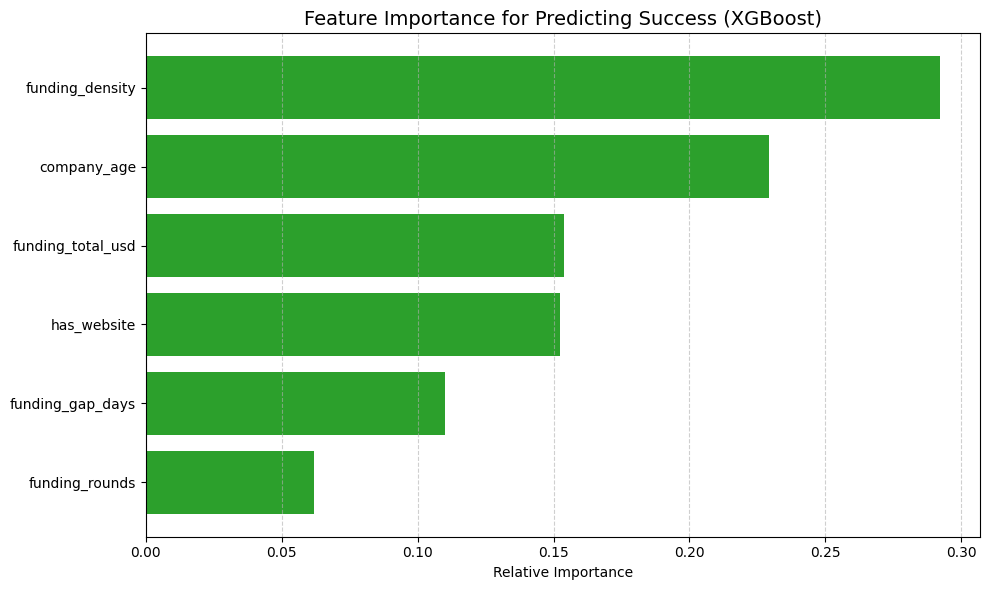

In [44]:
# Extract feature importances from XGBoost and convert to DataFrame
importances = model.feature_importances_
feature_names = X.columns

feat_usacount = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feat_usacount["Feature"], feat_usacount["Importance"], color="#2ca02c")
plt.title("Feature Importance for Predicting Success (XGBoost)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Predicting Failure (XGBoost)

In [47]:
usacount["is_fail"] = usacount["status_grouped"].apply(lambda x: 1 if x == "fail" else 0)


<ipython-input-47-22b338914fff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usacount["is_fail"] = usacount["status_grouped"].apply(lambda x: 1 if x == "fail" else 0)


In [48]:
from sklearn.model_selection import train_test_split

features = [
    "funding_total_usd",
    "funding_rounds",
    "funding_density",
    "company_age",
    "has_website",
    "funding_gap_days"
]

X = usacount[features]
y = usacount["is_fail"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Predicting Failure (Random Forest)

In [52]:
# Handle class imbalance: automatically balance each class
model_rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",  # Automatically balance the number of fail / not-fail samples
    n_estimators=100
)

model_rf.fit(X_train, y_train)

# Make predictions and print the evaluation report
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=["Not Fail", "Fail"]))


              precision    recall  f1-score   support

    Not Fail       0.93      0.88      0.90      6940
        Fail       0.13      0.21      0.16       581

    accuracy                           0.83      7521
   macro avg       0.53      0.54      0.53      7521
weighted avg       0.87      0.83      0.85      7521



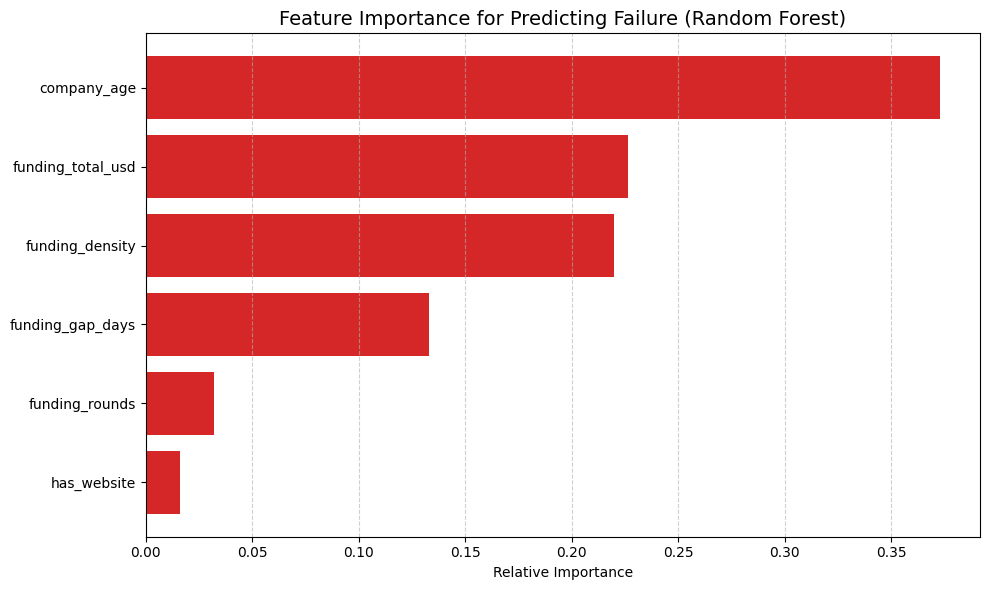

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

importances_rf = model_rf.feature_importances_
feat_usacount_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_usacount_rf["Feature"], feat_usacount_rf["Importance"], color="#d62728")
plt.title("Feature Importance for Predicting Failure (Random Forest)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Predicting Failure (XGBoost)

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Calculate class weights
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale  # Handle class imbalance: treat "fail" as the minority class
)

model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Not Fail", "Fail"]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

    Not Fail       0.95      0.69      0.80      6940
        Fail       0.14      0.58      0.22       581

    accuracy                           0.68      7521
   macro avg       0.54      0.64      0.51      7521
weighted avg       0.89      0.68      0.76      7521



In [50]:
features = [
    "funding_total_usd",
    "funding_rounds",
    "funding_density",
    "company_age",
    "has_website",
    "funding_gap_days"
]

X = usacount[features]
y = usacount["is_fail"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
)

model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_prob > 0.6).astype(int)
#y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred_threshold, target_names=["Not Success", "Success"]))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

 Not Success       0.94      0.83      0.88      6940
     Success       0.16      0.40      0.23       581

    accuracy                           0.79      7521
   macro avg       0.55      0.61      0.56      7521
weighted avg       0.88      0.79      0.83      7521



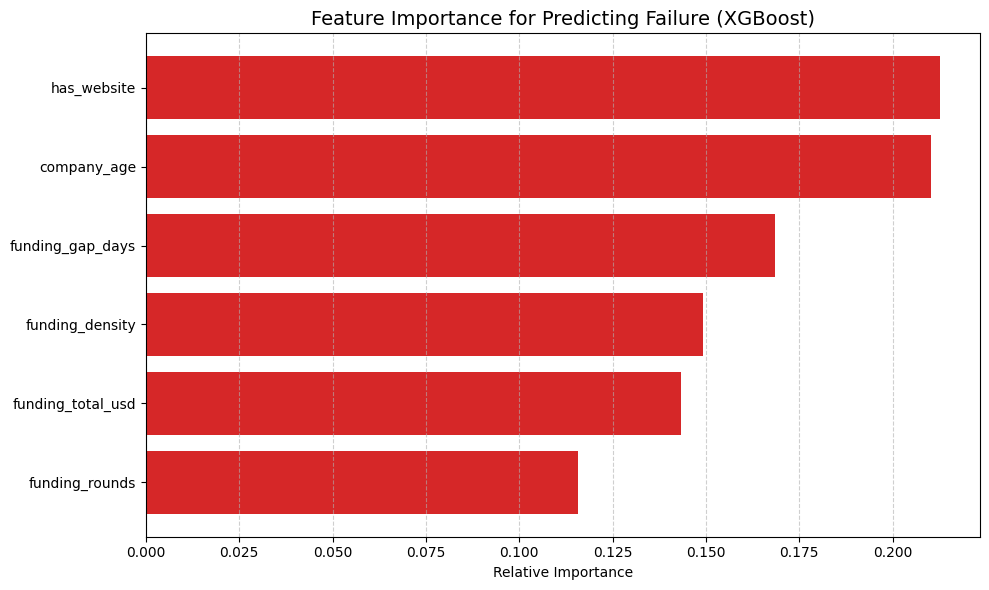

In [51]:
importances = model.feature_importances_
feature_names = X.columns

feat_usacount = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_usacount["Feature"], feat_usacount["Importance"], color="#d62728")
plt.title("Feature Importance for Predicting Failure (XGBoost)", fontsize=14)
plt.xlabel("Relative Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
